In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = tf.keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [5]:
df.shape

(420551, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [7]:
df['Date Time']=pd.to_datetime(df['Date Time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  datetime64[ns]
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

In [9]:
df=df.set_index('Date Time',drop=True)

In [10]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


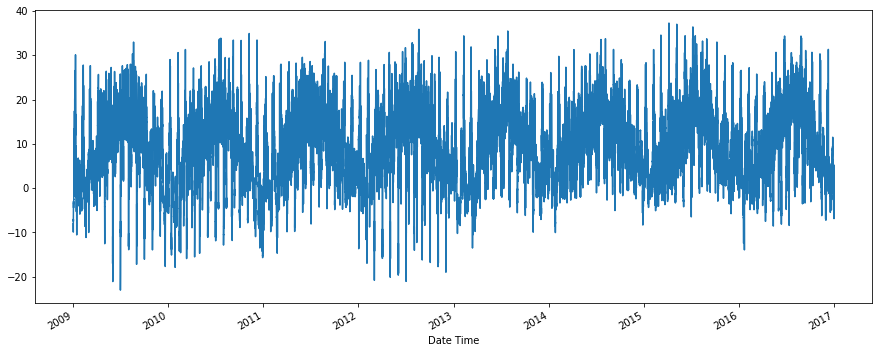

In [11]:
df['T (degC)'].plot(figsize=(15,6))

### using lstm

In [12]:
### scaling is required because lstm are sensitive to scale

from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
df_scaled=scaler.fit_transform(df)

In [15]:
df_scaled

array([[ 0.87422976, -2.0740129 , -2.12744145, ..., -0.01027133,
        -0.01893096, -0.25892163],
       [ 0.88021172, -2.12031274, -2.17329974, ..., -0.01500801,
        -0.02255326, -0.44581253],
       [ 0.87542615, -2.1321845 , -2.18505827, ..., -0.02310621,
        -0.03515888, -0.03626766],
       ...,
       [ 1.26903882, -1.49704566, -1.58537302, ..., -0.00950735,
        -0.01530866,  0.46672265],
       [ 1.26784243, -1.62407343, -1.71118934, ..., -0.0032427 ,
        -0.01299038,  0.58900929],
       [ 1.26903882, -1.69411678, -1.77938883, ..., -0.0072154 ,
        -0.01588823,  0.11716746]])

In [16]:
df_scaled.shape

(420551, 14)

In [17]:
df_scaled

array([[ 0.87422976, -2.0740129 , -2.12744145, ..., -0.01027133,
        -0.01893096, -0.25892163],
       [ 0.88021172, -2.12031274, -2.17329974, ..., -0.01500801,
        -0.02255326, -0.44581253],
       [ 0.87542615, -2.1321845 , -2.18505827, ..., -0.02310621,
        -0.03515888, -0.03626766],
       ...,
       [ 1.26903882, -1.49704566, -1.58537302, ..., -0.00950735,
        -0.01530866,  0.46672265],
       [ 1.26784243, -1.62407343, -1.71118934, ..., -0.0032427 ,
        -0.01299038,  0.58900929],
       [ 1.26903882, -1.69411678, -1.77938883, ..., -0.0072154 ,
        -0.01588823,  0.11716746]])

In [18]:
training_size=int(len(df_scaled)*0.65)
test_size=len(df_scaled)-training_size

In [19]:
train_data,test_data=df_scaled[0:training_size,:],df_scaled[training_size:len(df_scaled),:1]

In [20]:
training_size, test_size

(273358, 147193)

In [21]:
def create_dataset(dataset,timestep=1):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX), np.array(dataY)

In [22]:
timestep=30
X_train,y_train=create_dataset(train_data,timestep)
X_test,y_test=create_dataset(test_data,timestep)

In [23]:
X_train.shape, y_train.shape

((273327, 30), (273327,))

In [24]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
X_train.shape, X_test.shape

((273327, 30, 1), (147162, 30, 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()

In [28]:
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [31]:
model.fit(X_train,y_train,epochs=100,batch_size=100,validation_data=(X_test,y_test),callbacks=early_stopping)

Epoch 1/100
2734/2734 [==============================] - 39s 12ms/step - loss: 0.0049 - val_loss: 7.2229e-04
Epoch 2/100
2734/2734 [==============================] - 36s 13ms/step - loss: 9.7385e-04 - val_loss: 2.3664e-04
Epoch 3/100
2734/2734 [==============================] - 32s 12ms/step - loss: 6.3790e-04 - val_loss: 1.7123e-04
Epoch 4/100
2734/2734 [==============================] - 32s 12ms/step - loss: 5.9956e-04 - val_loss: 3.7094e-04
Epoch 5/100
2734/2734 [==============================] - 33s 12ms/step - loss: 5.8978e-04 - val_loss: 1.3334e-04
Epoch 6/100
2734/2734 [==============================] - 32s 12ms/step - loss: 5.0828e-04 - val_loss: 1.3369e-04
Epoch 7/100
2734/2734 [==============================] - 36s 13ms/step - loss: 4.8660e-04 - val_loss: 1.2353e-04
Epoch 8/100
2734/2734 [==============================] - 32s 12ms/step - loss: 5.6736e-04 - val_loss: 1.4153e-04
Epoch 9/100
2734/2734 [==============================] - 31s 11ms/step - loss: 5.2711e-04 - val_loss

In [32]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

4599/4599 [==============================] - 17s 4ms/step


In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

ValueError: ignored